<a href="https://colab.research.google.com/github/AdiMakhija12/Meta-Learning-Assignment/blob/main/ECGTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
base_dir='/content/drive/MyDrive/physionet_A_N.csv'

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dirfile=pd.read_csv(base_dir)

In [ ]:
dirfile.shape

(18370, 271)

In [ ]:
dirfile.tail(20)

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,...,TS_261,TS_262,TS_263,TS_264,TS_265,TS_266,TS_267,TS_268,TS_269,CLASS
18350,-139.0,-151.0,-64.0,-24.0,-51.0,-71.0,-69.0,-4.0,-11.0,-139.0,...,131.0,40.0,26.0,16.0,4.0,-8.0,-65.0,-82.0,-90.0,A
18351,-166.0,-300.0,-292.0,-288.0,-271.0,-238.0,-224.0,-221.0,-218.0,-210.0,...,108.0,168.0,87.0,-38.0,-78.0,-90.0,-74.0,-29.0,-18.0,A
18352,368.0,694.0,653.0,603.0,553.0,519.0,488.0,448.0,426.0,393.0,...,-83.0,-111.0,-118.0,-124.0,-127.0,-114.0,-101.0,-153.0,-216.0,A
18353,297.0,523.0,512.0,514.0,521.0,558.0,629.0,591.0,467.0,450.0,...,-26.0,-36.0,-9.0,20.0,0.0,15.0,19.0,205.0,105.0,A
18354,-47.0,7.0,9.0,-5.0,25.0,71.0,109.0,119.0,80.0,-11.0,...,-77.0,-20.0,-30.0,318.0,-265.0,-224.0,-18.0,38.0,33.0,A
18355,38.0,150.0,183.0,108.0,-5.0,-44.0,-50.0,-50.0,-48.0,-61.0,...,149.0,228.0,120.0,-6.0,-20.0,-20.0,-21.0,-19.0,-49.0,A
18356,-3.0,2.0,-3.0,-4.0,-3.0,-6.0,-2.0,-32.0,-61.0,-69.0,...,239.0,153.0,-100.0,-112.0,-64.0,-48.0,-47.0,-59.0,-58.0,A
18357,-56.0,-57.0,398.0,-272.0,-35.0,-11.0,10.0,66.0,197.0,242.0,...,-84.0,-64.0,-50.0,-36.0,-4.0,0.0,1.0,-23.0,-15.0,A
18358,-19.0,31.0,132.0,-94.0,-29.0,-2.0,28.0,96.0,143.0,250.0,...,453.0,-213.0,78.0,81.0,85.0,102.0,181.0,259.0,185.0,A
18359,127.0,334.0,272.0,244.0,264.0,411.0,761.0,218.0,228.0,218.0,...,157.0,164.0,149.0,70.0,-18.0,-82.0,-102.0,-114.0,-127.0,A


In [ ]:
dirfile.describe()

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,...,TS_260,TS_261,TS_262,TS_263,TS_264,TS_265,TS_266,TS_267,TS_268,TS_269
count,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,...,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000
mean,6.460425,5.024823,4.541698,6.391889,6.158356,5.750136,4.165106,3.910996,3.444529,3.132281,...,7.016222,8.752041,8.110343,10.027055,7.581383,7.465705,9.962929,9.961132,8.139575,8.737180
std,272.334830,420.495452,402.284830,386.746853,378.025853,364.795591,347.348664,343.027604,337.468859,324.780727,...,198.537713,192.926446,197.262111,199.259975,196.717561,199.346913,199.376930,197.770150,197.604523,201.765898
min,-3614.000000,-6466.000000,-5019.000000,-4764.000000,-5952.000000,-6422.000000,-5255.000000,-6984.000000,-4687.000000,-5096.000000,...,-3479.000000,-2398.000000,-2790.000000,-3484.000000,-3402.000000,-3597.000000,-3756.000000,-3384.000000,-3154.000000,-4153.000000
25%,-71.000000,-79.000000,-79.000000,-79.000000,-79.000000,-77.000000,-77.000000,-75.000000,-75.000000,-75.000000,...,-60.000000,-59.000000,-59.000000,-59.000000,-60.000000,-60.000000,-59.000000,-59.000000,-59.000000,-58.000000
50%,-8.000000,-9.000000,-9.000000,-9.000000,-11.000000,-10.000000,-10.000000,-10.000000,-9.000000,-8.000000,...,-9.000000,-10.000000,-10.000000,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-10.000000
75%,72.000000,82.000000,82.000000,80.000000,80.000000,79.000000,77.000000,73.000000,73.000000,70.750000,...,53.000000,52.000000,52.000000,53.000000,53.000000,52.000000,55.000000,55.000000,53.000000,53.000000
max,3344.000000,5514.000000,6134.000000,6305.000000,6479.000000,5658.000000,5728.000000,5847.000000,6070.000000,5308.000000,...,3109.000000,4482.000000,5790.000000,5405.000000,4082.000000,4027.000000,4170.000000,3503.000000,3908.000000,3190.000000


In [ ]:
classes=dirfile['CLASS']

In [ ]:
dirfile.isnull().values.sum()

0

In [ ]:
class_dist=dirfile['CLASS'].astype('str').value_counts()

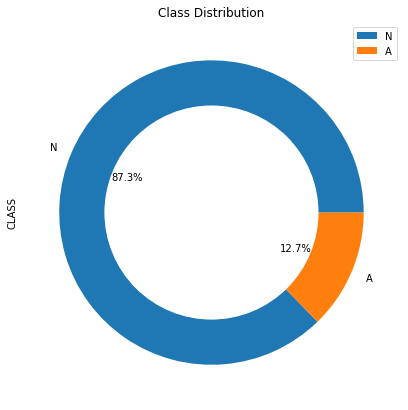

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 7))
p = class_dist.plot(kind='pie',
                    labels=['N','A'],
                    autopct='%1.1f%%')
p.add_artist(plt.Circle((0,0), 0.7, color='white'))
plt.title('Class Distribution')
plt.legend()
plt.show()
plt.savefig('Origial Class Distribution.PNG')

In [ ]:
dirfile['CLASS'].replace(['N', 'A'],[0, 1], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
import scipy
from scipy import stats

In [ ]:
dirfile_z_score=dirfile.copy()

In [ ]:
dirfile_z_score = stats.zscore(dirfile_z_score)

In [ ]:
dirfile_z_score['CLASS']=classes

In [ ]:
labels=['N','A']
colours=['blue','red']

In [ ]:
X=[i for i in range(270)]

In [ ]:
dirfile_z_score.head(7)

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,...,TS_261,TS_262,TS_263,TS_264,TS_265,TS_266,TS_267,TS_268,TS_269,CLASS
0,-0.490073,-0.646933,-0.610384,-0.608662,-0.585051,-0.566772,-0.740386,-0.807278,-0.679917,-0.539247,...,-0.195686,-0.152645,-0.145678,-0.150379,-0.253162,-0.315807,-0.166668,0.070144,-0.196952,0
1,-0.174277,1.564804,-0.108239,-0.308717,-0.230568,-0.199433,-0.141548,0.087718,0.232785,0.181259,...,-0.159402,0.171805,0.471623,0.124134,-0.027419,-0.039940,-0.116103,-0.122164,-0.013566,0
2,0.001981,0.004697,0.018540,0.030016,0.078943,0.203544,-0.011991,-0.066792,1.228459,0.753968,...,-0.159402,-0.208410,-0.205903,-0.211382,-0.092634,-0.044956,-0.090821,0.019537,0.263990,0
3,0.446299,0.625411,0.595262,0.523892,0.496915,0.625710,0.572452,0.536674,0.615053,0.692387,...,-0.408208,-0.355427,-0.271146,1.959302,-0.408674,-0.471296,-0.379042,-0.193015,-0.073043,0
4,0.024014,0.116473,0.187579,0.128274,-0.111525,4.011259,-0.584918,-0.536155,-0.534714,-0.397609,...,-0.123118,-0.228688,-0.301258,-0.145295,0.113044,0.035296,7.893412,-0.876216,-1.039536,0
5,0.035030,0.889392,-0.299651,-0.321645,-0.156497,-0.207657,-0.144427,2.457855,0.526153,0.615410,...,-0.501511,-0.482165,-0.381557,-0.221549,-0.167881,0.170722,0.283361,0.110630,-0.073043,0
6,0.181912,0.261544,0.369048,0.443734,0.285284,-0.325534,0.837322,0.679524,0.446144,0.372162,...,-0.506694,-0.096881,0.055070,0.063131,0.007697,-0.019877,-0.040256,0.151116,0.145037,0


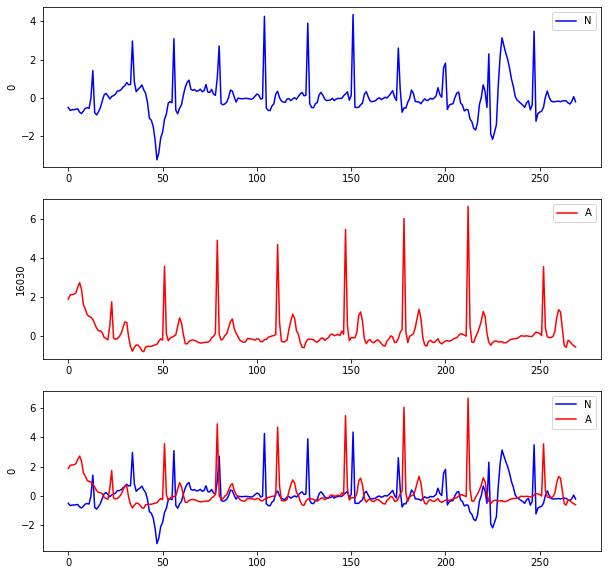

In [ ]:
fig, ax = plt.subplots(3, figsize=(10, 10))

for i in range(2):
    t = sns.lineplot(x=X,y=(dirfile_z_score[dirfile_z_score['CLASS'] == i].iloc[0])[:-1], label=labels[i], color=colours[i], ax=ax[i])
    t = sns.lineplot(x=X,y=(dirfile_z_score[dirfile_z_score['CLASS'] == i].iloc[0])[:-1], label=labels[i], color=colours[i], ax=ax[2])

# Results
1) Features 30-50,  and 215-230 show major difference and thus, are of major importance.

In [ ]:
ndf=(dirfile[dirfile['CLASS'] == 0].mean())

In [ ]:
ndf

TS_0       5.073737
TS_1       3.932127
TS_2       3.775359
TS_3       6.628447
TS_4       7.183780
            ...    
TS_266    10.087024
TS_267    10.913038
TS_268     8.473862
TS_269     8.325140
CLASS      0.000000
Length: 271, dtype: float64

In [ ]:
ndf = ndf.copy()
ndf = ndf /ndf.abs().max() #normailzation

In [ ]:
ndf

TS_0      0.390908
TS_1      0.302953
TS_2      0.290874
TS_3      0.510692
TS_4      0.553478
            ...   
TS_266    0.777159
TS_267    0.840800
TS_268    0.652873
TS_269    0.641414
CLASS     0.000000
Length: 271, dtype: float64

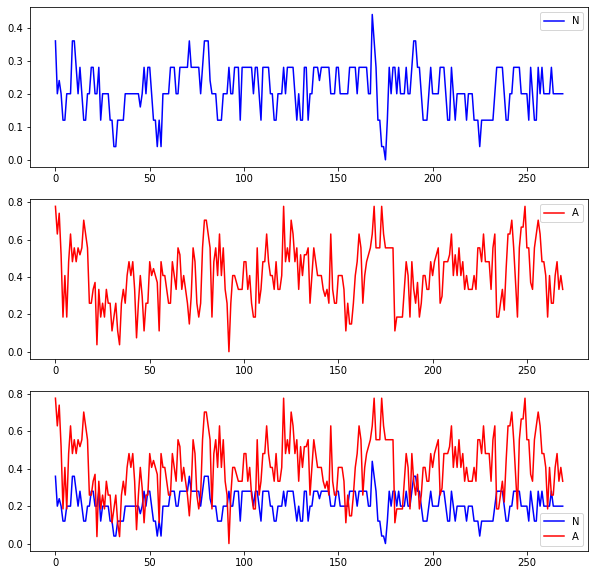

In [ ]:
fig, ax = plt.subplots(3, figsize=(10, 10))

for i in range(2):
  ndf=(dirfile[dirfile['CLASS'] == i].median())
  ndf = ndf.copy()

  ndf =ndf = (ndf - ndf.min()) / (ndf.max() - ndf.min())    
  t = sns.lineplot(x=X,y=(ndf)[:-1], label=labels[i], color=colours[i], ax=ax[i])
  t = sns.lineplot(x=X,y=(ndf)[:-1], label=labels[i], color=colours[i], ax=ax[2])

# Preprocessing and Classification

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
z=dirfile['CLASS']

In [ ]:
a=dirfile.copy()
a.pop('CLASS')

0        0
1        0
2        0
3        0
4        0
        ..
18365    1
18366    1
18367    1
18368    1
18369    1
Name: CLASS, Length: 18370, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(a, z, test_size = .25, random_state = 18)

In [ ]:
clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18) 

In [ ]:
clf.fit(x_train, y_train)
# performing predictions on the test dataset
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[3991    0]
 [ 602    0]]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.8689309819290224
